   PatientID  Age  BloodPressure  Cholesterol Diabetes Smoker Disease
0          1   25            120          180       No     No      No
1          2   35            140          200      Yes     No     Yes
2          3   45            130          195       No    Yes     Yes
3          4   50            150          210      Yes    Yes     Yes
4          5   28            118          170       No     No      No


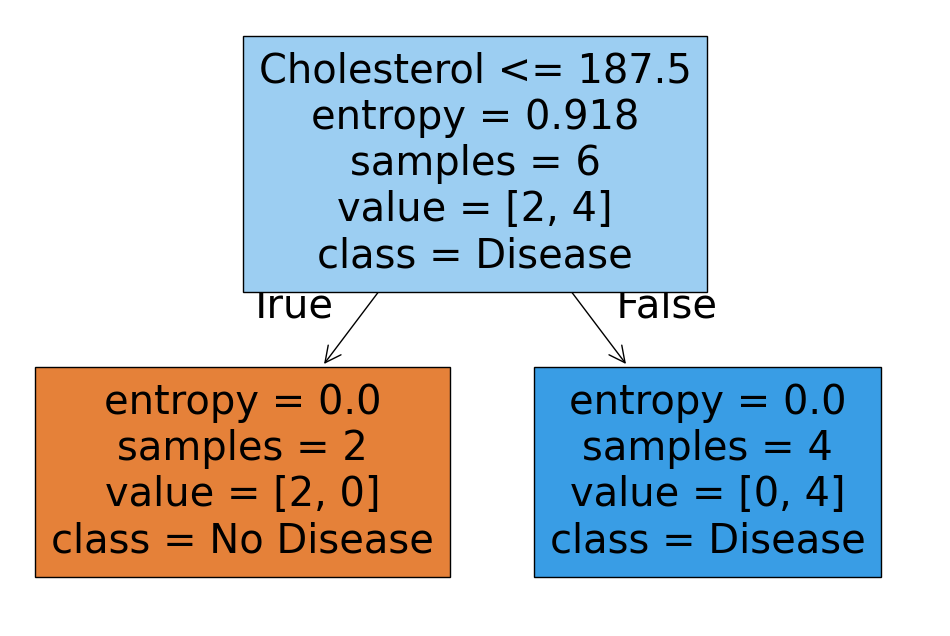

Accuracy: 0.75
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


df = pd.read_csv("hospital_data.csv")
print(df.head())


df["Diabetes"] = df["Diabetes"].map({"No":0, "Yes":1})
df["Smoker"] = df["Smoker"].map({"No":0, "Yes":1})
df["Disease"] = df["Disease"].map({"No":0, "Yes":1})


X = df[["Age", "BloodPressure", "Cholesterol", "Diabetes", "Smoker"]]
y = df["Disease"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)


clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)


plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.show()

y_pred = clf.predict(X_test)

print("Accuracy:", clf.score(X_test, y_test))
print("Classification Report:", classification_report(y_test, y_pred))
